### Introdução Projeto BNDES
###### O BNDES oferecem oportunidades e empréstimos para  investimentos em projetos estruturados e informações úteis em setores destacados da economia brasileira. Então durante a análise de datasets retirado no proprio site do BNDES, vamos tirar alguns insights importantes.  Iremos analisar taxas de juros, porte de empresa, setores empresariais, regiões onde mais possuem empréstimos e etc. Mas antes temos que importar, tratar e analisar toda a base. Com isso, podemos gerais informações importantes através dos dados armazenados.

#### Importando as bibliotecas necessárias para realização de tratamento e vizualização das Informações tirada dos Dados.

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.cbook import boxplot_stats
import matplotlib.pyplot as plt

In [9]:
#importanto as base de dados (operacoes-financiamento-operacoes-nao-automaticas.csv)
nao_automaticas = pd.read_csv('operacoes-financiamento-operacoes-nao-automaticas.csv', sep = ';', decimal = ',', na_values = '----------', low_memory=False)
nao_automaticas.head(5)

,cliente,cnpj,descricao_do_projeto,uf,municipio,municipio_codigo,numero_do_contrato,data_da_contratacao,valor_contratado_reais,valor_desembolsado_reais,...,subsetor_cnae_nome,setor_bndes,subsetor_bndes,porte_do_cliente,natureza_do_cliente,instituicao_financeira_credenciada,cnpj_da_instituicao_financeira_credenciada,tipo_de_garantia,tipo_de_excepcionalidade,situacao_do_contrato
0,MUNICIPIO DE RIBEIRAO PRETO,56.024.581/0001-56,PROGRAMA DE MODERNIZACAO DA ADMINISTRACAO TRIB...,SP,RIBEIRAO PRETO,3543402,1247021,2002-01-02,9090000.00,9007445.10,...,ADMINISTRACAO PUBLICA EM GERAL ...,COMERCIO/SERVICOS,COMÉRCIO E SERVIÇOS,GRANDE,ADMINISTRAÇÃO PÚBLICA DIRETA - GOVERNO MUNICIPAL,NaN,NaN,"OUTRA, DE NATUREZA ESPECÍFICA OU MISTA",NaN,LIQUIDADO
1,INSTITUTO DE DESENVOLVIMENTO SUSTENTAVEL DO BA...,02.275.306/0001-86,PROJETO DIREITO E CIDADANIA; PROJETO DEMONSTRA...,BA,ITUBERA,2917300,1247221,2002-01-03,706600.00,745030.36,...,ATIV ATENCAO A SAUDE HUMANA INTEGR C/ASSIST SO...,COMERCIO/SERVICOS,COMÉRCIO E SERVIÇOS,MICRO,PRIVADA,NaN,NaN,NÃO SE APLICA,NaN,LIQUIDADO
2,INSTITUTO DE DESENVOLVIMENTO SUSTENTAVEL DO BA...,02.275.306/0001-86,PROJETO DIREITO E CIDADANIA; PROJETO DEMONSTRA...,BA,ITUBERA,2917300,1247221,2002-01-03,75691.59,78500.00,...,ATIV ATENCAO A SAUDE HUMANA INTEGR C/ASSIST SO...,COMERCIO/SERVICOS,COMÉRCIO E SERVIÇOS,MICRO,PRIVADA,NaN,NaN,NÃO SE APLICA,NaN,LIQUIDADO
3,INSTITUTO DE DESENVOLVIMENTO SUSTENTAVEL DO BA...,02.275.306/0001-86,PROJETO DIREITO E CIDADANIA; PROJETO DEMONSTRA...,BA,ITUBERA,2917300,1247221,2002-01-03,603981.41,653834.69,...,ATIV ATENCAO A SAUDE HUMANA INTEGR C/ASSIST SO...,COMERCIO/SERVICOS,COMÉRCIO E SERVIÇOS,MICRO,PRIVADA,NaN,NaN,NÃO SE APLICA,NaN,LIQUIDADO
4,ACEF S/A,46.722.831/0001-78,AQUISICAO DE EQUIPAMENTOS NACIONAIS E MOBILIAR...,SP,FRANCA,3516200,1255421,2002-01-09,340201.00,340189.32,...,EDUCACAO SUPERIOR - GRADUACAO ...,COMERCIO/SERVICOS,COMÉRCIO E SERVIÇOS,GRANDE,PRIVADA,BANCO BRADESCO S.A.,6.074695e+13,DEFINIDA PELO AGENTE FINANCEIRO,NaN,LIQUIDADO


In [10]:
#importanto as base de dados (operacoes-financiamento-operacoes-indiretas-automaticas.csv')
op_automaticas = pd.read_csv('operacoes-financiamento-operacoes-indiretas-automaticas.csv', sep = ';', decimal = ',', na_values = '----------')
op_automaticas.tail(5)

,cliente,cpf_cnpj,uf,municipio,municipio_codigo,data_da_contratacao,valor_da_operacao_em_reais,valor_desembolsado_reais,fonte_de_recurso_desembolsos,custo_financeiro,...,subsetor_cnae_agrupado,subsetor_cnae_codigo,subsetor_cnae_nome,setor_bndes,subsetor_bndes,porte_do_cliente,natureza_do_cliente,instituicao_financeira_credenciada,cnpj_do_agente_financeiro,situacao_da_operacao
2098229,JADIMO TRANSPORTES RODOVIARIOS DE CARGAS LTDA,**.*24.908/0001-**,SC,ITAJAI,4208203,2021-10-29,1062000,NaN,-,SELIC,...,Transporte terrestre,H4930202,TRANSP ROD CARGA EXC PROD PERIG MUDANCA INTER-...,INFRA-ESTRUTURA,TRANSPORTE RODOVIÁRIO,MÉDIA,PRIVADA,BANCO RODOBENS S.A.,33.603.457.0001-40,ATIVA
2098230,METALURGICA GIRARDI EIRELI,**.*54.870/0001-**,SC,SAO BENTO DO SUL,4215802,2021-10-30,3750,NaN,-,SELIC,...,Ativ financeira e seguro,K6424703,COOPERATIVAS DE CREDITO MUTUO,COMERCIO/SERVICOS,COMÉRCIO E SERVIÇOS,MICRO,PRIVADA,COOPERATIVA CENTRAL DE CREDITO - AILOS,05.463.212.0001-29,ATIVA
2098231,BEN HUR PILLATI & CIA LTDA,**.*15.699/0001-**,SC,SAO BENTO DO SUL,4215802,2021-10-30,20000,NaN,-,SELIC,...,Ativ financeira e seguro,K6424703,COOPERATIVAS DE CREDITO MUTUO,COMERCIO/SERVICOS,COMÉRCIO E SERVIÇOS,PEQUENA,PRIVADA,COOPERATIVA CENTRAL DE CREDITO - AILOS,05.463.212.0001-29,ATIVA
2098232,JAISSON XAVIER PAIS,**.*11.861/0001-**,SC,SAO BENTO DO SUL,4215802,2021-10-30,3000,NaN,-,SELIC,...,Ativ financeira e seguro,K6424703,COOPERATIVAS DE CREDITO MUTUO,COMERCIO/SERVICOS,COMÉRCIO E SERVIÇOS,MICRO,PRIVADA,COOPERATIVA CENTRAL DE CREDITO - AILOS,05.463.212.0001-29,ATIVA
2098233,MULLER PILLATI & PILLATI LTDA,**.*06.874/0001-**,SC,SAO BENTO DO SUL,4215802,2021-10-30,20000,NaN,-,SELIC,...,Ativ financeira e seguro,K6424703,COOPERATIVAS DE CREDITO MUTUO,COMERCIO/SERVICOS,COMÉRCIO E SERVIÇOS,PEQUENA,PRIVADA,COOPERATIVA CENTRAL DE CREDITO - AILOS,05.463.212.0001-29,ATIVA


#### Verificando a estrutura das duas beses de dados

In [11]:
#base1.
nao_automaticas.info(verbose=True) #Verbose (mostra todas as linhas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19723 entries, 0 to 19722
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   cliente                                     19723 non-null  object 
 1   cnpj                                        19723 non-null  object 
 2   descricao_do_projeto                        19723 non-null  object 
 3   uf                                          19723 non-null  object 
 4   municipio                                   19723 non-null  object 
 5   municipio_codigo                            19723 non-null  int64  
 6   numero_do_contrato                          19723 non-null  int64  
 7   data_da_contratacao                         19723 non-null  object 
 8   valor_contratado_reais                      19723 non-null  float64
 9   valor_desembolsado_reais                    19723 non-null  float64
 10  fonte_de_r

In [12]:
#base2
op_automaticas.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098234 entries, 0 to 2098233
Data columns (total 30 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   cliente                             object 
 1   cpf_cnpj                            object 
 2   uf                                  object 
 3   municipio                           object 
 4   municipio_codigo                    int64  
 5   data_da_contratacao                 object 
 6   valor_da_operacao_em_reais          int64  
 7   valor_desembolsado_reais            float64
 8   fonte_de_recurso_desembolsos        object 
 9   custo_financeiro                    object 
 10  juros                               float64
 11  prazo_carencia_meses                int64  
 12  prazo_amortizacao_meses             int64  
 13  modalidade_de_apoio                 object 
 14  forma_de_apoio                      object 
 15  produto                             object 
 16  

#### Trasnformando a base de dados.
###### Como vamos trabalhar com uma única base de dados, para facilitar a análise, vamos unificá-las. Para isso é necessário padronizar as variáveis(colunas).

In [13]:
#Criando um atributos para identificar a origem da base, depois da junção. Com isso iremos saber qual variável é e de qual dataset.
nao_automaticas['tipo_operacao'] = 'NAO_AUTOMATICA'
op_automaticas['tipo_operacao'] = 'AUTOMATICA'
display(nao_automaticas.head(3))
display(op_automaticas.head(3))

,cliente,cnpj,descricao_do_projeto,uf,municipio,municipio_codigo,numero_do_contrato,data_da_contratacao,valor_contratado_reais,valor_desembolsado_reais,...,setor_bndes,subsetor_bndes,porte_do_cliente,natureza_do_cliente,instituicao_financeira_credenciada,cnpj_da_instituicao_financeira_credenciada,tipo_de_garantia,tipo_de_excepcionalidade,situacao_do_contrato,tipo_operacao
0,MUNICIPIO DE RIBEIRAO PRETO,56.024.581/0001-56,PROGRAMA DE MODERNIZACAO DA ADMINISTRACAO TRIB...,SP,RIBEIRAO PRETO,3543402,1247021,2002-01-02,9090000.00,9007445.10,...,COMERCIO/SERVICOS,COMÉRCIO E SERVIÇOS,GRANDE,ADMINISTRAÇÃO PÚBLICA DIRETA - GOVERNO MUNICIPAL,NaN,NaN,"OUTRA, DE NATUREZA ESPECÍFICA OU MISTA",NaN,LIQUIDADO,NAO_AUTOMATICA
1,INSTITUTO DE DESENVOLVIMENTO SUSTENTAVEL DO BA...,02.275.306/0001-86,PROJETO DIREITO E CIDADANIA; PROJETO DEMONSTRA...,BA,ITUBERA,2917300,1247221,2002-01-03,706600.00,745030.36,...,COMERCIO/SERVICOS,COMÉRCIO E SERVIÇOS,MICRO,PRIVADA,NaN,NaN,NÃO SE APLICA,NaN,LIQUIDADO,NAO_AUTOMATICA
2,INSTITUTO DE DESENVOLVIMENTO SUSTENTAVEL DO BA...,02.275.306/0001-86,PROJETO DIREITO E CIDADANIA; PROJETO DEMONSTRA...,BA,ITUBERA,2917300,1247221,2002-01-03,75691.59,78500.00,...,COMERCIO/SERVICOS,COMÉRCIO E SERVIÇOS,MICRO,PRIVADA,NaN,NaN,NÃO SE APLICA,NaN,LIQUIDADO,NAO_AUTOMATICA


,cliente,cpf_cnpj,uf,municipio,municipio_codigo,data_da_contratacao,valor_da_operacao_em_reais,valor_desembolsado_reais,fonte_de_recurso_desembolsos,custo_financeiro,...,subsetor_cnae_codigo,subsetor_cnae_nome,setor_bndes,subsetor_bndes,porte_do_cliente,natureza_do_cliente,instituicao_financeira_credenciada,cnpj_do_agente_financeiro,situacao_da_operacao,tipo_operacao
0,CISAM SILOS E ARMAZENS LTDA,**.*45.954/0001-**,RS,SANTA CRUZ DO SUL,4316808,2002-01-02,3274614,3274614.0,RECURSOS LIVRES - ORGANISMOS,TJLP,...,H4900000,TRANSPORTE TERRESTRE,INFRA-ESTRUTURA,OUTROS TRANSPORTES,PEQUENA,PRIVADA,BANCO ITAUBANK S.A,60.394.079.0001-04,LIQUIDADA,AUTOMATICA
1,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,**.*16.560/0001-**,RS,COTIPORA,4305959,2002-01-02,15000,15000.0,RECURSOS VINCULADOS - FAT DEPÓSITOS ESPECIAIS,TAXA FIXA,...,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÁRIA,AGROPECUÁRIA,MICRO,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,92.816.560.0001-37,LIQUIDADA,AUTOMATICA
2,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,**.*16.560/0001-**,RS,COTIPORA,4305959,2002-01-02,15000,15000.0,RECURSOS VINCULADOS - FAT DEPÓSITOS ESPECIAIS,TAXA FIXA,...,A0100000,"AGRICULTURA, PECUARIA E SERVICOS RELACIONADOS",AGROPECUÁRIA,AGROPECUÁRIA,MICRO,PRIVADA,BANCO REGIONAL DE DESENVOLVIMENTO DO EXTREMO SUL,92.816.560.0001-37,LIQUIDADA,AUTOMATICA


In [14]:
#verificando o nomes dos atibutos 
print(nao_automaticas.columns)
print(op_automaticas.columns)

Index(['cliente', 'cnpj', 'descricao_do_projeto', 'uf', 'municipio',
       'municipio_codigo', 'numero_do_contrato', 'data_da_contratacao',
       'valor_contratado_reais', 'valor_desembolsado_reais',
       'fonte_de_recurso_desembolsos', 'custo_financeiro', 'juros',
       'prazo_carencia_meses', 'prazo_amortizacao_meses',
       'modalidade_de_apoio', 'forma_de_apoio', 'produto',
       'instrumento_financeiro', 'inovacao', 'area_operacional', 'setor_cnae',
       'subsetor_cnae_agrupado', 'subsetor_cnae_codigo', 'subsetor_cnae_nome',
       'setor_bndes', 'subsetor_bndes', 'porte_do_cliente',
       'natureza_do_cliente', 'instituicao_financeira_credenciada',
       'cnpj_da_instituicao_financeira_credenciada', 'tipo_de_garantia',
       'tipo_de_excepcionalidade', 'situacao_do_contrato', 'tipo_operacao'],
      dtype='object')
Index(['cliente', 'cpf_cnpj', 'uf', 'municipio', 'municipio_codigo',
       'data_da_contratacao', 'valor_da_operacao_em_reais',
       'valor_desembolsado

#### Alterando e padronizando dos nomes das colunas.

In [15]:
#Renomeando colunas 
nao_automaticas.rename(columns={'cnpj':'cpf_cnpj', 'valor_contratado_reais':'valor_da_operacao_em_reais', 'cnpj_da_instituicao_financeira_credenciada':'cnpj_do_agente_financeiro', 'situacao_do_contrato':'situacao_da_operacao'}, inplace=True)

In [16]:
#deletando colunas
nao_automaticas.drop(columns=["tipo_de_excepcionalidade",'tipo_de_garantia', 'numero_do_contrato','descricao_do_projeto'],axis=1, inplace=True)


In [17]:
#Verificando se os atributos tem os nomes iguais das duas bases de dados.
print(nao_automaticas.columns == op_automaticas.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True]


In [18]:
# Unificando os dois conjutos de dataset
operacao = pd.concat([nao_automaticas, op_automaticas])
display(operacao)

,cliente,cpf_cnpj,uf,municipio,municipio_codigo,data_da_contratacao,valor_da_operacao_em_reais,valor_desembolsado_reais,fonte_de_recurso_desembolsos,custo_financeiro,...,subsetor_cnae_codigo,subsetor_cnae_nome,setor_bndes,subsetor_bndes,porte_do_cliente,natureza_do_cliente,instituicao_financeira_credenciada,cnpj_do_agente_financeiro,situacao_da_operacao,tipo_operacao
0,MUNICIPIO DE RIBEIRAO PRETO,56.024.581/0001-56,SP,RIBEIRAO PRETO,3543402,2002-01-02,9090000.00,9007445.10,RECURSOS VINCULADOS - PIS/PASEP,TJLP,...,O8411600,ADMINISTRACAO PUBLICA EM GERAL ...,COMERCIO/SERVICOS,COMÉRCIO E SERVIÇOS,GRANDE,ADMINISTRAÇÃO PÚBLICA DIRETA - GOVERNO MUNICIPAL,NaN,NaN,LIQUIDADO,NAO_AUTOMATICA
1,INSTITUTO DE DESENVOLVIMENTO SUSTENTAVEL DO BA...,02.275.306/0001-86,BA,ITUBERA,2917300,2002-01-03,706600.00,745030.36,RECURSOS ESTATUTÁRIOS - PRÓPRIOS ESTATUTÁRIOS,SEM CUSTO,...,Q8700000,ATIV ATENCAO A SAUDE HUMANA INTEGR C/ASSIST SO...,COMERCIO/SERVICOS,COMÉRCIO E SERVIÇOS,MICRO,PRIVADA,NaN,NaN,LIQUIDADO,NAO_AUTOMATICA
2,INSTITUTO DE DESENVOLVIMENTO SUSTENTAVEL DO BA...,02.275.306/0001-86,BA,ITUBERA,2917300,2002-01-03,75691.59,78500.00,RECURSOS ESTATUTÁRIOS - PRÓPRIOS ESTATUTÁRIOS,SEM CUSTO,...,Q8700000,ATIV ATENCAO A SAUDE HUMANA INTEGR C/ASSIST SO...,COMERCIO/SERVICOS,COMÉRCIO E SERVIÇOS,MICRO,PRIVADA,NaN,NaN,LIQUIDADO,NAO_AUTOMATICA
3,INSTITUTO DE DESENVOLVIMENTO SUSTENTAVEL DO BA...,02.275.306/0001-86,BA,ITUBERA,2917300,2002-01-03,603981.41,653834.69,RECURSOS ESTATUTÁRIOS - PRÓPRIOS ESTATUTÁRIOS,SEM CUSTO,...,Q8700000,ATIV ATENCAO A SAUDE HUMANA INTEGR C/ASSIST SO...,COMERCIO/SERVICOS,COMÉRCIO E SERVIÇOS,MICRO,PRIVADA,NaN,NaN,LIQUIDADO,NAO_AUTOMATICA
4,ACEF S/A,46.722.831/0001-78,SP,FRANCA,3516200,2002-01-09,340201.00,340189.32,RECURSOS LIVRES - FAT,TJLP,...,P8531700,EDUCACAO SUPERIOR - GRADUACAO ...,COMERCIO/SERVICOS,COMÉRCIO E SERVIÇOS,GRANDE,PRIVADA,BANCO BRADESCO S.A.,60746948000112.0,LIQUIDADO,NAO_AUTOMATICA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098229,JADIMO TRANSPORTES RODOVIARIOS DE CARGAS LTDA,**.*24.908/0001-**,SC,ITAJAI,4208203,2021-10-29,1062000.00,NaN,-,SELIC,...,H4930202,TRANSP ROD CARGA EXC PROD PERIG MUDANCA INTER-...,INFRA-ESTRUTURA,TRANSPORTE RODOVIÁRIO,MÉDIA,PRIVADA,BANCO RODOBENS S.A.,33.603.457.0001-40,ATIVA,AUTOMATICA
2098230,METALURGICA GIRARDI EIRELI,**.*54.870/0001-**,SC,SAO BENTO DO SUL,4215802,2021-10-30,3750.00,NaN,-,SELIC,...,K6424703,COOPERATIVAS DE CREDITO MUTUO,COMERCIO/SERVICOS,COMÉRCIO E SERVIÇOS,MICRO,PRIVADA,COOPERATIVA CENTRAL DE CREDITO - AILOS,05.463.212.0001-29,ATIVA,AUTOMATICA
2098231,BEN HUR PILLATI & CIA LTDA,**.*15.699/0001-**,SC,SAO BENTO DO SUL,4215802,2021-10-30,20000.00,NaN,-,SELIC,...,K6424703,COOPERATIVAS DE CREDITO MUTUO,COMERCIO/SERVICOS,COMÉRCIO E SERVIÇOS,PEQUENA,PRIVADA,COOPERATIVA CENTRAL DE CREDITO - AILOS,05.463.212.0001-29,ATIVA,AUTOMATICA
2098232,JAISSON XAVIER PAIS,**.*11.861/0001-**,SC,SAO BENTO DO SUL,4215802,2021-10-30,3000.00,NaN,-,SELIC,...,K6424703,COOPERATIVAS DE CREDITO MUTUO,COMERCIO/SERVICOS,COMÉRCIO E SERVIÇOS,MICRO,PRIVADA,COOPERATIVA CENTRAL DE CREDITO - AILOS,05.463.212.0001-29,ATIVA,AUTOMATICA


In [19]:
#Definindo municipio_codigo como atributo nominal
operacao = operacao.astype({'municipio_codigo': object})
operacao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117957 entries, 0 to 2098233
Data columns (total 31 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   cliente                             object 
 1   cpf_cnpj                            object 
 2   uf                                  object 
 3   municipio                           object 
 4   municipio_codigo                    object 
 5   data_da_contratacao                 object 
 6   valor_da_operacao_em_reais          float64
 7   valor_desembolsado_reais            float64
 8   fonte_de_recurso_desembolsos        object 
 9   custo_financeiro                    object 
 10  juros                               float64
 11  prazo_carencia_meses                int64  
 12  prazo_amortizacao_meses             int64  
 13  modalidade_de_apoio                 object 
 14  forma_de_apoio                      object 
 15  produto                             object 
 16  

In [20]:
#Verificando os valores missing
operacao.isnull().sum()

cliente                                   0
cpf_cnpj                                  0
uf                                        0
municipio                                 0
municipio_codigo                          0
data_da_contratacao                       0
valor_da_operacao_em_reais                0
valor_desembolsado_reais              15892
fonte_de_recurso_desembolsos              0
custo_financeiro                          0
juros                                   436
prazo_carencia_meses                      0
prazo_amortizacao_meses                   0
modalidade_de_apoio                       0
forma_de_apoio                            0
produto                                   0
instrumento_financeiro                    0
inovacao                                  0
area_operacional                          0
setor_cnae                                0
subsetor_cnae_agrupado                    0
subsetor_cnae_codigo                      0
subsetor_cnae_nome              

#### Como tem categorias duplicados.Vamos fazer a limpeza dos dados abaixo.

In [21]:
operacao['uf'].value_counts()

 SP    437523
 RS    290448
 PR    277712
 MG    234045
 SC    218845
 RJ     79661
 GO     73405
 BA     73248
 ES     62771
 MT     54426
 PE     49859
 CE     33414
 MS     32572
 PA     29831
 MA     22361
 RO     19634
 TO     16628
 DF     14546
 AM     13668
 PB     13277
 RN     13021
 AL      9931
 PI      9849
 SE      8597
SP       4570
 AC      4535
 AP      2371
IE       2160
 RR      2056
RJ       1978
MG       1533
RS       1425
SC       1240
PR       1052
BA       1026
GO        613
RN        511
CE        487
PE        453
MT        384
MS        376
PA        297
ES        271
PI        222
MA        203
RO        169
AM        161
DF        124
TO        100
SE         97
PB         94
AL         68
AC         63
AP         41
RR          5
Name: uf, dtype: int64

In [22]:
operacao['setor_cnae'].value_counts()

COMERCIO E SERVICOS               1439027
AGROPECUÁRIA E PESCA               335082
INDUSTRIA DE TRANSFORMAÇÃO         309120
INDUSTRIA EXTRATIVA                 15005
COMERCIO E SERVICOS                 12272
INDUSTRIA DE TRANSFORMAÇÃO           6505
AGROPECUÁRIA E PESCA                  760
INDUSTRIA EXTRATIVA                   186
Name: setor_cnae, dtype: int64

In [23]:
operacao['natureza_do_cliente'].value_counts()

PRIVADA                                             2094583
PRIVADA                                               17864
ADMINISTRAÇÃO PÚBLICA DIRETA - GOVERNO MUNICIPAL       3589
PÚBLICA INDIRETA                                       1249
ADMINISTRAÇÃO PÚBLICA DIRETA - GOVERNO ESTADUAL         666
ADMINISTRAÇÃO PÚBLICA DIRETA - GOVERNO FEDERAL            6
Name: natureza_do_cliente, dtype: int64

In [24]:
operacao['situacao_da_operacao'].value_counts()

LIQUIDADA    1859757
ATIVA         238477
LIQUIDADO      10012
ATIVO           9495
-                216
Name: situacao_da_operacao, dtype: int64

In [25]:
#Padronizando os niveis de fatores da situação_da_operacao
operacao['situacao_da_operacao'] = operacao['situacao_da_operacao'].replace(['ATIVO', 'LIQUIDADO'], ['ATIVA', 'LIQUIDADA']).str.strip()
operacao['situacao_da_operacao'].value_counts()

LIQUIDADA    1869769
ATIVA         247972
-                216
Name: situacao_da_operacao, dtype: int64

In [26]:
#Retirando os espaços em branco das categorias.
operacao['uf'] = operacao['uf'].str.strip()
operacao['setor_cnae'] = operacao['setor_cnae'].str.strip()
operacao['natureza_do_cliente'] = operacao['natureza_do_cliente'].str.strip()

In [27]:
#Dados Tratados
operacao['natureza_do_cliente'].value_counts()

PRIVADA                                             2112447
ADMINISTRAÇÃO PÚBLICA DIRETA - GOVERNO MUNICIPAL       3589
PÚBLICA INDIRETA                                       1249
ADMINISTRAÇÃO PÚBLICA DIRETA - GOVERNO ESTADUAL         666
ADMINISTRAÇÃO PÚBLICA DIRETA - GOVERNO FEDERAL            6
Name: natureza_do_cliente, dtype: int64

In [28]:
#Dados Tratados
display(operacao['uf'].value_counts())
print(operacao['uf'].unique())
print(len(operacao['uf'].unique()))


SP    442093
RS    291873
PR    278764
MG    235578
SC    220085
RJ     81639
BA     74274
GO     74018
ES     63042
MT     54810
PE     50312
CE     33901
MS     32948
PA     30128
MA     22564
RO     19803
TO     16728
DF     14670
AM     13829
RN     13532
PB     13371
PI     10071
AL      9999
SE      8694
AC      4598
AP      2412
IE      2160
RR      2061
Name: uf, dtype: int64

['SP' 'BA' 'AM' 'AL' 'GO' 'MG' 'RJ' 'RN' 'TO' 'MT' 'PA' 'RS' 'SC' 'PE'
 'ES' 'PB' 'SE' 'CE' 'PR' 'IE' 'MS' 'AC' 'RO' 'MA' 'PI' 'DF' 'RR' 'AP']
28


In [29]:
#Dados Tratados
operacao['setor_cnae'].value_counts()

COMERCIO E SERVICOS           1451299
AGROPECUÁRIA E PESCA           335842
INDUSTRIA DE TRANSFORMAÇÃO     315625
INDUSTRIA EXTRATIVA             15191
Name: setor_cnae, dtype: int64

##### Importado o contato direto com o setor de Geo-Informação

In [30]:
geo_informacao = pd.read_csv('geoinformacao_br_2020.csv', sep=';', decimal = ',', na_values = '----------')
geo_informacao.head(5)


,CD_MUN,NM_MUN,SIGLA_UF,longitude,latitude,NM_UF,CD_GEOCUF,NM_REGIAO,CD_REGIAO
0,1100015,Alta Floresta D'Oeste,RO,-62.27466,-12.47013,Rondônia,11,Norte,1
1,1100023,Ariquemes,RO,-62.95726,-9.95189,Rondônia,11,Norte,1
2,1100031,Cabixi,RO,-60.63981,-13.47488,Rondônia,11,Norte,1
3,1100049,Cacoal,RO,-61.32473,-11.30129,Rondônia,11,Norte,1
4,1100056,Cerejeiras,RO,-61.26095,-13.20356,Rondônia,11,Norte,1


In [31]:
#informações da dataset
geo_informacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CD_MUN     5570 non-null   int64  
 1   NM_MUN     5570 non-null   object 
 2   SIGLA_UF   5570 non-null   object 
 3   longitude  5570 non-null   float64
 4   latitude   5570 non-null   float64
 5   NM_UF      5570 non-null   object 
 6   CD_GEOCUF  5570 non-null   int64  
 7   NM_REGIAO  5570 non-null   object 
 8   CD_REGIAO  5570 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 391.8+ KB


#### Analisando os Dados de Geo_informações

In [32]:
# Verificando as atribuições da forma de apoio dos financiamentos
operacao['forma_de_apoio'].value_counts()

INDIRETA    2102340
DIRETA        15617
Name: forma_de_apoio, dtype: int64

In [33]:
# Verificando se a atribuição do dataset concatenando se estava correta
operacao['tipo_operacao'].value_counts(normalize=True).mul(100)

AUTOMATICA        99.068772
NAO_AUTOMATICA     0.931228
Name: tipo_operacao, dtype: float64

In [34]:
#croslab faz duas ou mais tabela cruzada de varáveis.
#croslab entre forma_de_apoio e tipo_operacao
#o método mul faz a função de multiplicação, ou seja, multiplicando por 100 teremos uma porcentagem
pd.crosstab(operacao['forma_de_apoio'], operacao['tipo_operacao'], normalize='index').mul(100)

tipo_operacao,AUTOMATICA,NAO_AUTOMATICA
forma_de_apoio,,
DIRETA,0.000000,100.000000
INDIRETA,99.804694,0.195306


In [35]:
#1 Verificando a distribuição dos produtos para inovação
#2 Pegando a variavel inovação
#3 Contando os valores da operação
#4 Olhando a frequência
#5 Multiplica por 1000 para resultar em percentual
#6 Colocar duas casas decimais depois da vírcula
#7 Por último transforma a variável para tipo texto(string) e assim adiciona o caracter do percentual
#8 Foi preciso converter a variável para texto porque valor numerico não soma com string.
operacao['inovacao'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

NÃO    99.93%
SIM     0.07%
Name: inovacao, dtype: object

In [36]:
#Verificando as distribuição dos produtos contratados
counts = operacao['produto'].value_counts()
percent = operacao['produto'].value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'N':counts, 'Percentual':percent})

#Observamos que o 'BNDES FINAME' tem o maior volume de operações. O BNDES FINAME é financiamento de máquinas e equipamentos. 

,N,Percentual
BNDES FINAME,1534885,72.5%
BNDES AUTOMÁTICO,524267,24.8%
BNDES FINAME LEASING,24799,1.2%
BNDES FINAME AGRÍCOLA,14678,0.7%
BNDES FINEM,14277,0.7%
BNDES PROJECT FINANCE,1623,0.1%
BNDES LIMITE DE CRÉDITO,1535,0.1%
BNDES NÃO REEMBOLSÁVEL,1274,0.1%
BNDES EMPRÉSTIMO PONTE,224,0.0%
BNDES DEBENTURES SIMPLES,211,0.0%


1. FNAME: Financimanero da produção e aquisição de máquinas e equipamentos nacionais credenciados no BNDES
2. BNDES AUTOMÁTICO: Financiamento de até 150 milhões de reais para o projeto de investimentos de empresas e todos os setores.
3. BNDES FINAME LEASING: Financimanto de aquisição de máquinas, equipamentos, bens de informática e automação destinados a operação arrendamento mercantil financeiro e operacional.
4. BNDES FINAME AGRÍCOLA: FInancimanento de aquisição de máquinas, equipamentos de bens informáticas e automação de nacionais novos.
5. FINEM: Financiamento para projetos de investimentos, públicos ou privados, voltados à geração e aumento de capacidade produtivas, nos diversos setores da ecanomia.

In [37]:
#Verificando a distribuição dos financiamentos por 'Natureza do Cliente'
display(operacao['natureza_do_cliente'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')
print(operacao['natureza_do_cliente'].value_counts())
#Como na análise abaixo podemos observar que o governo fereral teve 6 empréstimos.

PRIVADA                                             99.74%
ADMINISTRAÇÃO PÚBLICA DIRETA - GOVERNO MUNICIPAL     0.17%
PÚBLICA INDIRETA                                     0.06%
ADMINISTRAÇÃO PÚBLICA DIRETA - GOVERNO ESTADUAL      0.03%
ADMINISTRAÇÃO PÚBLICA DIRETA - GOVERNO FEDERAL        0.0%
Name: natureza_do_cliente, dtype: object

PRIVADA                                             2112447
ADMINISTRAÇÃO PÚBLICA DIRETA - GOVERNO MUNICIPAL       3589
PÚBLICA INDIRETA                                       1249
ADMINISTRAÇÃO PÚBLICA DIRETA - GOVERNO ESTADUAL         666
ADMINISTRAÇÃO PÚBLICA DIRETA - GOVERNO FEDERAL            6
Name: natureza_do_cliente, dtype: int64


In [46]:
#levando o conjuntos "geo_informacao" para o conjuntos de dados de operaçãoes
operacao = pd.merge(left=operacao, right=geo_informacao, left_on='municipio_codigo', right_on='CD_MUN', how='left')
operacao.head(5)

,cliente,cpf_cnpj,uf,municipio,municipio_codigo,data_da_contratacao,valor_da_operacao_em_reais,valor_desembolsado_reais,fonte_de_recurso_desembolsos,custo_financeiro,...,tipo_operacao,CD_MUN,NM_MUN,SIGLA_UF,longitude,latitude,NM_UF,CD_GEOCUF,NM_REGIAO,CD_REGIAO
0,MUNICIPIO DE RIBEIRAO PRETO,56.024.581/0001-56,SP,RIBEIRAO PRETO,3543402,2002-01-02,9090000.00,9007445.10,RECURSOS VINCULADOS - PIS/PASEP,TJLP,...,NAO_AUTOMATICA,3543402.0,Ribeirão Preto,SP,-47.82130,-21.21084,São Paulo,35.0,Sudeste,3.0
1,INSTITUTO DE DESENVOLVIMENTO SUSTENTAVEL DO BA...,02.275.306/0001-86,BA,ITUBERA,2917300,2002-01-03,706600.00,745030.36,RECURSOS ESTATUTÁRIOS - PRÓPRIOS ESTATUTÁRIOS,SEM CUSTO,...,NAO_AUTOMATICA,2917300.0,Ituberá,BA,-39.23079,-13.74709,Bahia,29.0,Nordeste,2.0
2,INSTITUTO DE DESENVOLVIMENTO SUSTENTAVEL DO BA...,02.275.306/0001-86,BA,ITUBERA,2917300,2002-01-03,75691.59,78500.00,RECURSOS ESTATUTÁRIOS - PRÓPRIOS ESTATUTÁRIOS,SEM CUSTO,...,NAO_AUTOMATICA,2917300.0,Ituberá,BA,-39.23079,-13.74709,Bahia,29.0,Nordeste,2.0
3,INSTITUTO DE DESENVOLVIMENTO SUSTENTAVEL DO BA...,02.275.306/0001-86,BA,ITUBERA,2917300,2002-01-03,603981.41,653834.69,RECURSOS ESTATUTÁRIOS - PRÓPRIOS ESTATUTÁRIOS,SEM CUSTO,...,NAO_AUTOMATICA,2917300.0,Ituberá,BA,-39.23079,-13.74709,Bahia,29.0,Nordeste,2.0
4,ACEF S/A,46.722.831/0001-78,SP,FRANCA,3516200,2002-01-09,340201.00,340189.32,RECURSOS LIVRES - FAT,TJLP,...,NAO_AUTOMATICA,3516200.0,Franca,SP,-47.38111,-20.55522,São Paulo,35.0,Sudeste,3.0


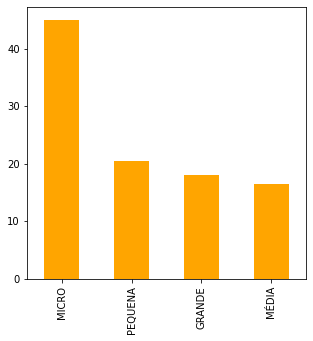

In [38]:
#Verificando a distribuição dos financiamentos por portes dos clientes.
grafico = operacao['porte_do_cliente'].value_counts(normalize=True).mul(100).plot.bar(color='orange', figsize=(5,5));

INFRA-ESTRUTURA      874907
COMERCIO/SERVICOS    568226
AGROPECUÁRIA         335842
INDUSTRIA            330816
INFRAESTRUTURA         8166
Name: setor_bndes, dtype: int64

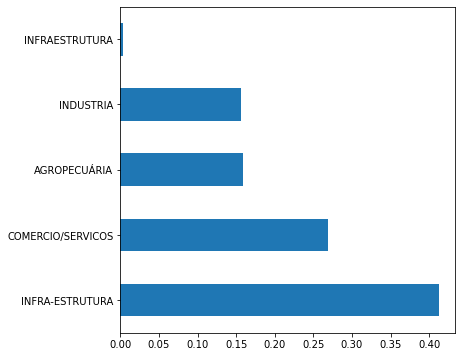

In [39]:
#Verificando a distribuição dos financiamentos do setores do banco
operacao['setor_bndes'].value_counts(normalize=True).plot.barh(figsize=(6,6))
operacao['setor_bndes'].value_counts()

In [40]:
#Obervando o gráfico acima, temos duas variaveis repetida. Iremos fazer a trativas novamente.
operacao['setor_bndes'] = operacao['setor_bndes'].replace(['INFRAESTRUTURA'],['INFRA-ESTRUTURA']).str.strip() #tratado, vejam:
operacao['setor_bndes'].value_counts()

INFRA-ESTRUTURA      883073
COMERCIO/SERVICOS    568226
AGROPECUÁRIA         335842
INDUSTRIA            330816
Name: setor_bndes, dtype: int64

<AxesSubplot:>

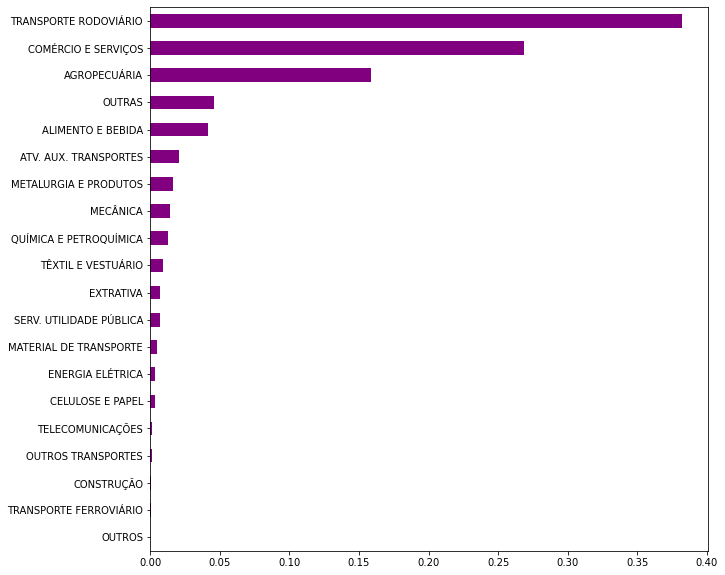

In [41]:
#Verificando a distribuição dos financiamentos dos sub-setores do banco.
operacao['subsetor_bndes'].value_counts(normalize=True).sort_values().plot.barh(color='purple',figsize=(10,10))

#Abaixo Podemos identificar que o setor rodoviário é onde adiquirem mais empréstimos.

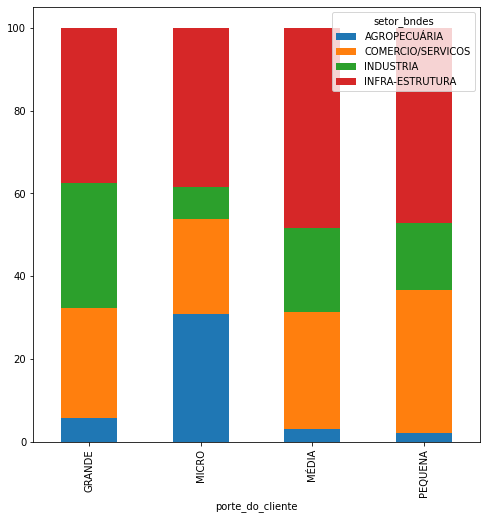

In [42]:
#Crostab entre forma de apoio e tipo de operação 
pd.crosstab(operacao['porte_do_cliente'], operacao['setor_bndes'], 
            normalize='index').mul(100).plot(kind='bar', stacked=True, figsize=(8,8));

#Obssevando abaixo que nas empresas de porte menores tem mais pedidos de infra-estruturas que outros porte.
#Enquanto, as indústrias está fortemente focado nas empresas de grande-porte.

<AxesSubplot:>

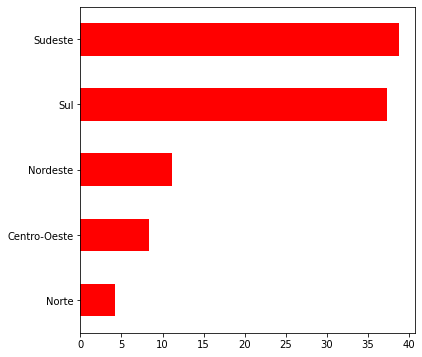

In [47]:
#Verificando a distribuição dos financiamentos por regiões do Brasil
operacao['NM_REGIAO'].value_counts(normalize=True).mul(100).sort_values().plot(kind='barh', color= 'red', figsize=(6,6))

#Identificamos que a região Sudeste e Sul onde recebem mais financiamentos.

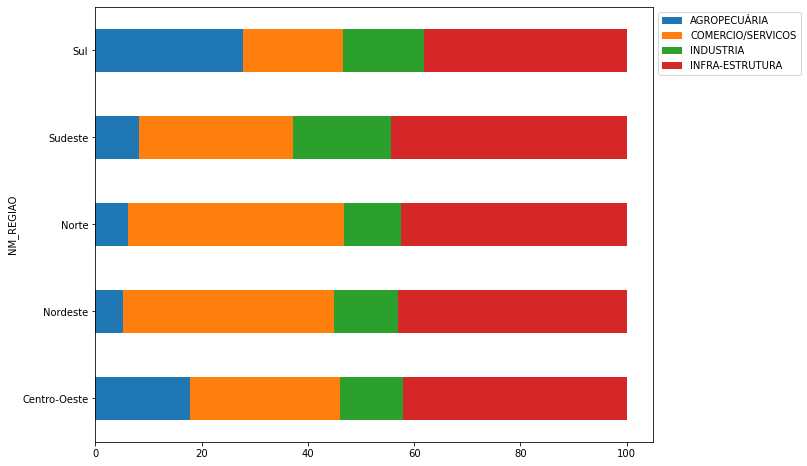

In [48]:
#Crosstab entre regiões do Brasil e setor onde são realizados mais financiamentos.
pd.crosstab(operacao['NM_REGIAO'], operacao['setor_bndes'], 
            normalize='index').mul(100).plot(kind='barh', stacked=True, figsize=(10, 8)).legend(bbox_to_anchor=(1,1))

#Percebemos que nas regiões em termos de setores na região SUL tem mais financiamentos em "Agropecuária".
#Regiõe Norte e Nordeste tem mais financiamentos em Comércio e Serviços que nas outras regiões do país.

<AxesSubplot:>

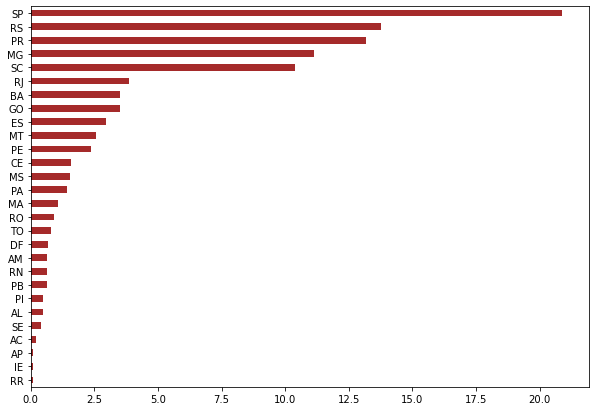

In [49]:
#Verificando a distribuição dos financiamentos por UF do Cliente
operacao['uf'].value_counts(normalize=True).mul(100).sort_values().plot(kind='barh', color='brown', figsize=(10,7))

#No estados de São Paulo onde acontece o maior financiamento 

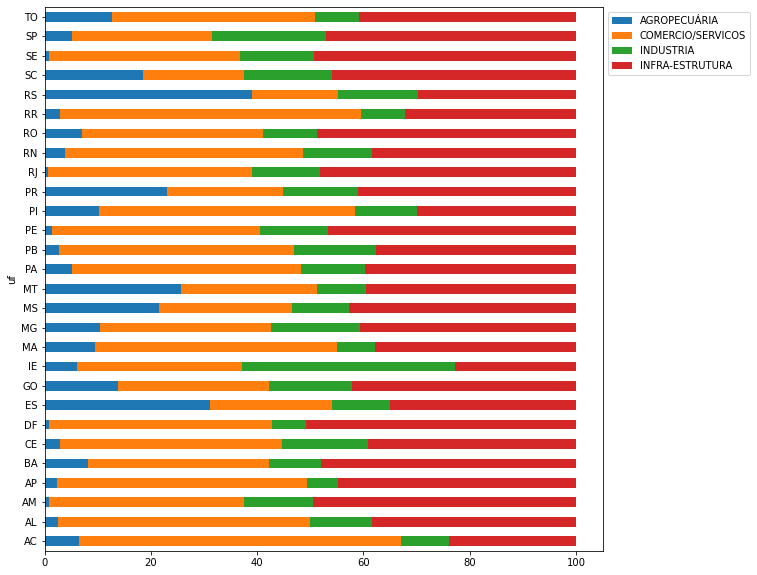

In [50]:
#Crosstab entre estados e setores do banco onde são realizados mais empréstimos
pd.crosstab(operacao['uf'], operacao['setor_bndes'], 
            normalize='index').mul(100).plot(kind='barh', stacked=True, figsize=(10,10)).legend(bbox_to_anchor=(1,1))

#Apesar de ter muitas informações nesse gráfico, ainda conseguimos tirar insights. Como:
# No estado do Acre tem a maior proporção de investimento de comécio e serviços.

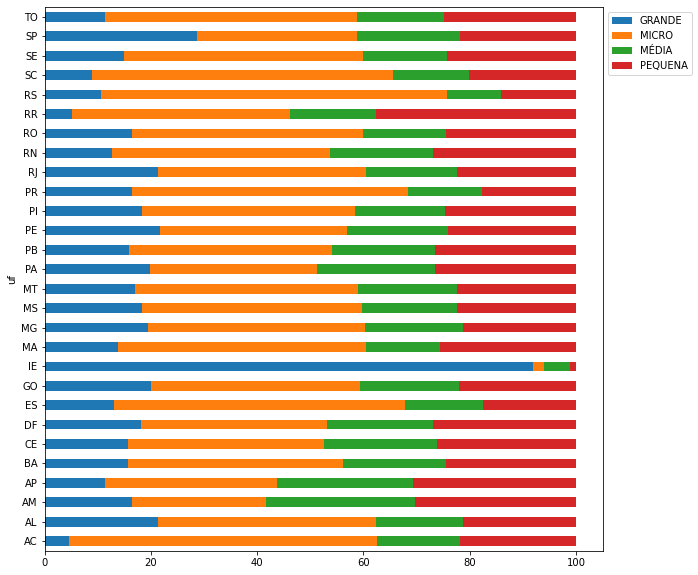

In [51]:
#Crosstab entre Estados do Brasil e porte do cliente que realizou o financiamento
pd.crosstab(operacao['uf'], operacao['porte_do_cliente'], 
            normalize='index').mul(100).plot(kind='barh', stacked=True, figsize=(10,10)).legend(bbox_to_anchor=(1,1))

#Podemos obersar por exemplo: Existem muitas empresas grandes do exterior.

In [52]:
# Gerando estatisticas descritivas de variáveis numericas para o DataFrame (não-automáticas).
operacao.describe(percentiles=[.05,.1,.25,.5,.75,0.9,0.95]).round(2)

,valor_da_operacao_em_reais,valor_desembolsado_reais,juros,prazo_carencia_meses,prazo_amortizacao_meses,CD_MUN,longitude,latitude,CD_GEOCUF,CD_REGIAO
count,2.117957e+06,2.102065e+06,2117521.00,2117957.00,2117957.00,2111448.00,2111448.00,2111448.00,2111448.00,2111448.00
mean,7.087628e+05,6.381131e+05,5.63,6.43,54.20,3663846.94,-48.11,-21.16,36.47,3.34
std,2.009595e+07,1.841130e+07,2.84,7.19,19.85,836941.22,5.26,6.89,8.38,0.93
min,8.000000e+00,0.000000e+00,0.00,0.00,0.00,1100015.00,-73.44,-33.65,11.00,1.00
5%,5.236800e+03,5.100000e+03,2.31,0.00,24.00,2111300.00,-54.69,-29.55,21.00,2.00
10%,1.085000e+04,1.070000e+04,2.56,0.00,33.00,2611101.00,-53.53,-28.57,26.00,2.00
25%,4.240000e+04,4.200000e+04,3.90,3.00,45.00,3167202.00,-51.78,-26.06,31.00,3.00
50%,1.150000e+05,1.138500e+05,5.00,3.00,54.00,3550308.00,-48.88,-22.88,35.00,3.00
75%,2.400000e+05,2.380000e+05,7.00,6.00,57.00,4213401.00,-45.26,-19.03,42.00,4.00
90%,5.000000e+05,5.000000e+05,8.75,12.00,72.00,4320263.00,-40.44,-9.59,43.00,4.00


In [53]:
# Operações de Juros maiores que 30%
operacao[operacao['juros'] > 30]

,cliente,cpf_cnpj,uf,municipio,municipio_codigo,data_da_contratacao,valor_da_operacao_em_reais,valor_desembolsado_reais,fonte_de_recurso_desembolsos,custo_financeiro,...,tipo_operacao,CD_MUN,NM_MUN,SIGLA_UF,longitude,latitude,NM_UF,CD_GEOCUF,NM_REGIAO,CD_REGIAO
22371,TRANSPORTES MAGUETA LTDA,**.*60.549/0001-**,SP,SAO PAULO,3550308,2002-01-23,55476.0,55476.0,RECURSOS LIVRES - PRÓPRIOS,TJLP,...,AUTOMATICA,3550308.0,São Paulo,SP,-46.64811,-23.65008,São Paulo,35.0,Sudeste,3.0


Text(0.5, 1.0, 'Prazo de Amortização')

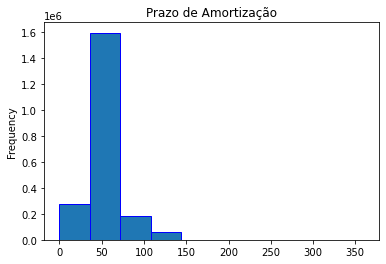

In [54]:
#Histograma no Prazo de Amortização
operacao['prazo_amortizacao_meses'].plot.hist(edgecolor='blue')
plt.title('Prazo de Amortização')

Text(0.5, 1.0, 'Juros')

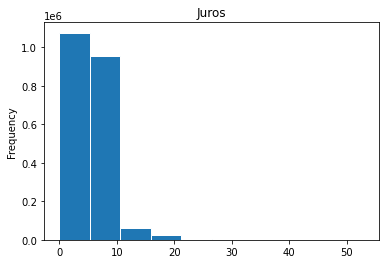

In [55]:
#Histograma de juros
operacao['juros'].plot.hist(edgecolor='white')
plt.title('Juros')

#Observamos que 0 a 10% de juros são muitas empresas. Passando de 10% os juros maiores são operados com poucas empresas. 
#Os juros de 5% é relativamente bom.

#### Analisando Produtos

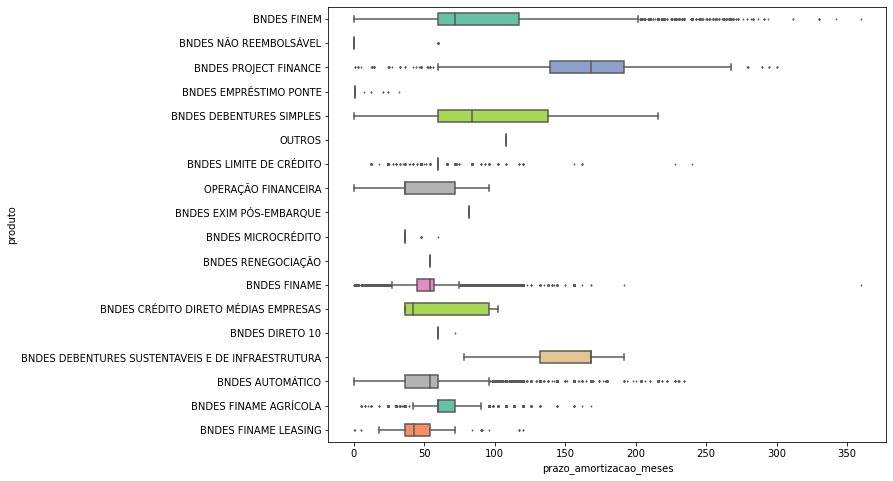

In [56]:
#Prazo de amortização por produto contratado
plt.figure(figsize=(10,8))
sns.boxplot(data=operacao, x = 'prazo_amortizacao_meses', y = 'produto',
            orient ='h', palette = 'Set2', fliersize=1, width=0.5, saturation=1)
plt.show()

# O Gráfico boxplot mostra a distribuição do prazo por produto. Com o boxplot temos uma noção da variabilidade dos dados, 
#se os dados estão mais centraliizados ou se estão com uma dispersão muito grande ou baixa.

In [57]:
#Analisando os valores contratados por produtos. 
operacao[['produto', 'valor_da_operacao_em_reais']].groupby('produto').describe(percentiles=[.05,.1,.25,.5,.75,0.9,0.95])

valor_da_operacao_em_reais  \
                                                                       count   
produto                                                                        
BNDES AUTOMÁTICO                                                    524267.0   
BNDES CRÉDITO DIRETO MÉDIAS EMPRESAS                                    40.0   
BNDES DEBENTURES SIMPLES                                               211.0   
BNDES DEBENTURES SUSTENTAVEIS E DE INFRAESTRUTURA                        5.0   
BNDES DIRETO 10                                                         13.0   
BNDES EMPRÉSTIMO PONTE                                                 224.0   
BNDES EXIM PÓS-EMBARQUE                                                  4.0   
BNDES FINAME                                                       1534885.0   
BNDES FINAME AGRÍCOLA                                                14678.0   
BNDES FINAME LEASING                                                 24799.0   
BNDES FINEM                                                          14277.0   
BNDES LIMITE DE CRÉDITO                                               1535.0   
BNDES MICROCRÉDITO                                                      65.0   
BNDES NÃO REEMBOLSÁVEL                                                1274.0   
BNDES PROJECT FINANCE                                                 1623.0   
BNDES RENEGOCIAÇÃO                                                       1.0   
OPERAÇÃO FINANCEIRA                                                     40.0   
OUTROS                                                                  16.0   

                                                                               \
                                                           mean           std   
produto                                                                         
BNDES AUTOMÁTICO                                   2.682777e+05  1.219946e+06   
BNDES CRÉDITO DIRETO MÉDIAS EMPRESAS               2.790000e+06  2.575345e+06   
BNDES DEBENTURES SIMPLES                           7.741126e+07  1.051969e+08   
BNDES DEBENTURES SUSTENTAVEIS E DE INFRAESTRUTURA  2.478566e+08  1.982306e+08   
BNDES DIRETO 10                                    7.137692e+06  3.363005e+06   
BNDES EMPRÉSTIMO PONTE                             1.415076e+08  2.409749e+08   
BNDES EXIM PÓS-EMBARQUE                            2.469467e+09  0.000000e+00   
BNDES FINAME                                       2.779820e+05  1.856022e+06   
BNDES FINAME AGRÍCOLA                              3.957885e+05  7.237096e+05   
BNDES FINAME LEASING                               2.977998e+05  5.262998e+05   
BNDES FINEM                                        4.530150e+07  2.009005e+08   
BNDES LIMITE DE CRÉDITO                            3.972576e+07  1.956605e+08   
BNDES MICROCRÉDITO                                 1.671265e+07  2.701788e+07   
BNDES NÃO REEMBOLSÁVEL                             4.657464e+06  1.064066e+07   
BNDES PROJECT FINANCE                              7.512555e+07  2.063369e+08   
BNDES RENEGOCIAÇÃO                                 2.421854e+05           NaN   
OPERAÇÃO FINANCEIRA                                6.098349e+08  1.065735e+09   
OUTROS                                             1.069508e+07  7.191986e+06   

                                                                               \
                                                            min            5%   
produto                                                                         
BNDES AUTOMÁTICO                                   8.000000e+00  2.100000e+03   
BNDES CRÉDITO DIRETO MÉDIAS EMPRESAS               7.000000e+05  8.000000e+05   
BNDES DEBENTURES SIMPLES                           2.246004e+06  8.619574e+06   
BNDES DEBENTURES SUSTENTAVEIS E DE INFRAESTRUTURA  9.000000e+07  9.505800e+07   
BNDES DIRETO 10                                    1.500000e+06  1.500000e+06   
BNDES EMPRÉSTIMO PO

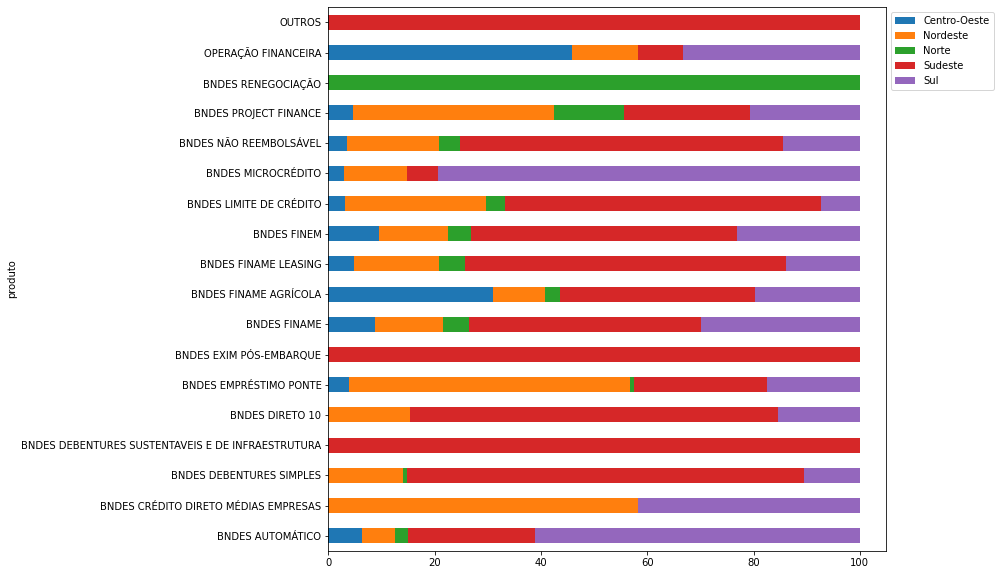

In [58]:
#Crosstab entre regiões do Brasil e tipo de operação
pd.crosstab(operacao['produto'], operacao['NM_REGIAO'], 
            normalize='index').mul(100).plot(kind='barh', stacked=True, figsize=(10,10)).legend(bbox_to_anchor=(1,1))

#Produtos que mais saem por região.

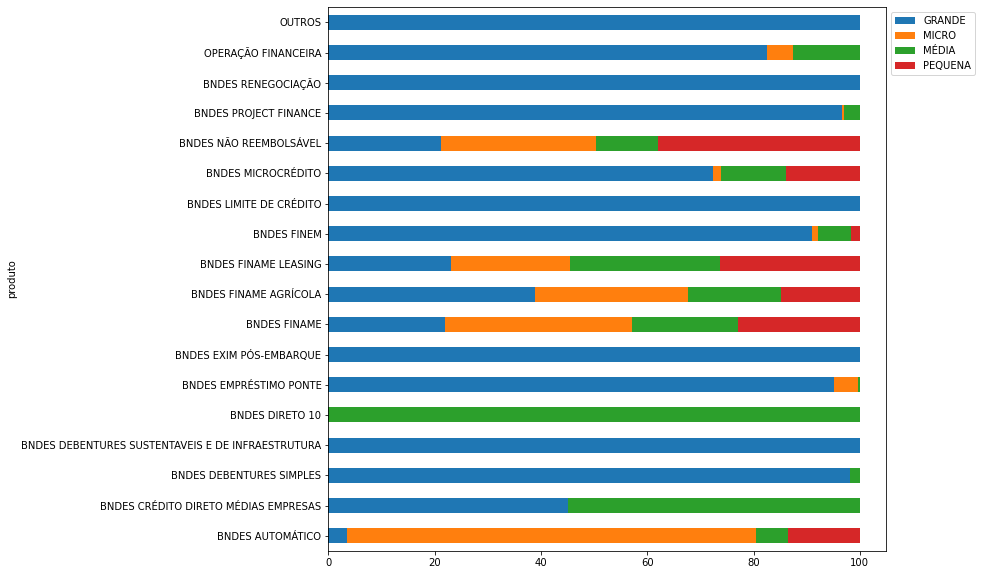

In [59]:
#Crosstab porte do cliente e por produtos contratados
pd.crosstab(operacao['produto'], operacao['porte_do_cliente'], 
            normalize='index').mul(100).plot(kind='barh', stacked=True, figsize=(10,10)).legend(bbox_to_anchor=(1,1))

# NO BNDES AUTOMATICO a maiorias são empresas micros.

#### Analisando por Porte de Empresa.

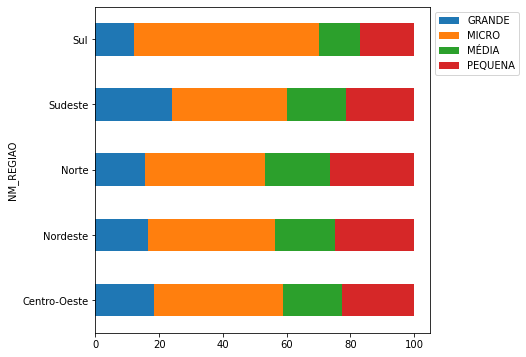

In [60]:
#Crosstab por região do Brasil e porte da empresa
pd.crosstab(operacao['NM_REGIAO'], operacao['porte_do_cliente'], 
            normalize='index').mul(100).plot(kind='barh', stacked=True, figsize=(6,6)).legend(bbox_to_anchor=(1,1))

In [61]:
#Crosstab contratado por porte da empresa
pd.crosstab(operacao['produto'], operacao['porte_do_cliente'], normalize='columns').mul(100).round(2).astype(str) + '%'

porte_do_cliente,GRANDE,MICRO,MÉDIA,PEQUENA
produto,,,,
BNDES AUTOMÁTICO,4.84%,42.29%,9.21%,16.31%
BNDES CRÉDITO DIRETO MÉDIAS EMPRESAS,0.0%,0.0%,0.01%,0.0%
BNDES DEBENTURES SIMPLES,0.05%,0.0%,0.0%,0.0%
BNDES DEBENTURES SUSTENTAVEIS E DE INFRAESTRUTURA,0.0%,0.0%,0.0%,0.0%
BNDES DIRETO 10,0.0%,0.0%,0.0%,0.0%
BNDES EMPRÉSTIMO PONTE,0.06%,0.0%,0.0%,0.0%
BNDES EXIM PÓS-EMBARQUE,0.0%,0.0%,0.0%,0.0%
BNDES FINAME,87.77%,56.63%,87.71%,81.52%
BNDES FINAME AGRÍCOLA,1.48%,0.44%,0.74%,0.5%


In [62]:
#Verificando a estatisca dos  médio por porte o cliente
operacao[['porte_do_cliente','juros']].groupby('porte_do_cliente').describe(percentiles=[.05,.1,.25,.5,.75,0.9,0.95])   

juros                                                 \
                     count      mean       std  min   5%   10%   25%  50%   
porte_do_cliente                                                            
GRANDE            383659.0  5.142519  2.616099  0.0  2.4  2.50  3.40  4.5   
MICRO             953014.0  5.723360  2.833558  0.0  2.0  2.50  4.00  5.4   
MÉDIA             347600.0  5.459058  2.793265  0.0  2.5  2.65  3.56  5.0   
PEQUENA           433248.0  5.982295  2.987807  0.0  2.5  3.00  4.00  5.5   

                                          
                  75%   90%    95%   max  
porte_do_cliente                          
GRANDE            6.0  8.50  10.00  24.9  
MICRO             7.7  8.75   9.87  53.0  
MÉDIA             6.5  8.50  10.00  27.1  
PEQUENA           7.0  9.50  12.50  28.8

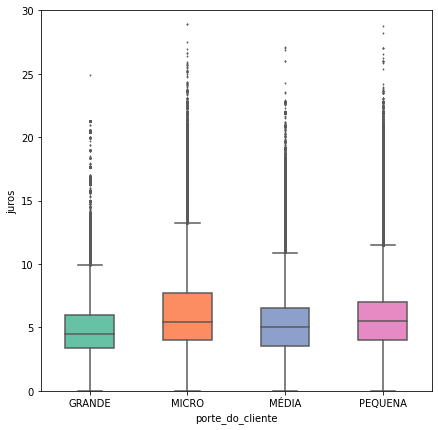

In [63]:
#juros por porte do cliente
plt.figure(figsize=(7,7))
sns.boxplot(data=operacao, y = 'juros', x = 'porte_do_cliente', 
           palette = 'Set2', fliersize= 1,
           width=0.5, saturation=1)
plt.ylim([0, 30])
plt.show()
            

In [64]:
#Verificando estatística dos prazos de amortização por porte do cliente
operacao[['porte_do_cliente', 'prazo_amortizacao_meses']].groupby('porte_do_cliente').describe(percentiles=[.05,.1,.25,.5,.75,0.9,0.95])

#Nesse caso não varia muito o portes das empresas. Grandes e médio porte está com a média de 56%, porte média e pequena está com 50%.

prazo_amortizacao_meses                                   \
                                   count       mean        std  min    5%   
porte_do_cliente                                                            
GRANDE                          383930.0  56.731922  25.894228  0.0  24.0   
MICRO                           953053.0  56.167824  18.309902  0.0  24.0   
MÉDIA                           347706.0  50.288419  17.626063  0.0  24.0   
PEQUENA                         433268.0  50.788332  17.500988  0.0  24.0   

                                                              
                   10%   25%   50%   75%   90%    95%    max  
porte_do_cliente                                              
GRANDE            33.0  45.0  54.0  60.0  96.0  102.0  360.0  
MICRO             36.0  48.0  57.0  60.0  84.0   96.0  231.0  
MÉDIA             30.0  42.0  54.0  57.0  60.0   84.0  360.0  
PEQUENA           30.0  42.0  54.0  57.0  60.0   84.0  231.0

In [65]:
#Verificando as estatísticas os valores dos financiamentos por porte do cliente
operacao[['porte_do_cliente', 'valor_da_operacao_em_reais']].groupby('porte_do_cliente').describe(percentiles=[.05,.1,.25,.5,.75,0.9,0.95])

#Na mediana tem o empréstimo médio de 67Mil na micro empresa

valor_da_operacao_em_reais                                    \
                                      count          mean           std   min   
porte_do_cliente                                                                
GRANDE                             383930.0  2.991356e+06  4.683530e+07  31.0   
MICRO                              953053.0  1.029078e+05  3.153851e+05   8.0   
MÉDIA                              347706.0  4.750413e+05  5.493187e+06  10.0   
PEQUENA                            433268.0  2.063540e+05  4.790762e+05  50.0   

                                                                            \
                       5%      10%      25%       50%       75%        90%   
porte_do_cliente                                                             
GRANDE            17850.0  32159.8  79600.0  208600.0  581280.0  1984000.0   
MICRO              3034.0   5000.0  17250.0   67200.0  145530.0   230238.0   
MÉDIA             22800.0  41600.0  99683.0  204000.0  428000.0   962717.0   
PEQUENA           16550.0  30000.0  70700.0  136500.0  244000.0   396000.0   

                                             
                          95%           max  
porte_do_cliente                             
GRANDE            5186798.911  9.889998e+09  
MICRO              303000.000  1.142667e+08  
MÉDIA             1500000.000  2.653720e+09  
PEQUENA            543555.250  1.000000e+08

In [66]:
# UF por porte do cliente 
pd.crosstab(operacao['uf'], operacao['porte_do_cliente'], normalize='index', margins=True).mul(100).round(2).astype(str) + '%'

#Nessa tabela tem o porte do cliente por estados. Vamos tirar alguns insights apesar da tabela não seja uma visualização legal. Por Exemplo:
#No RS apresenta o maior concetração de micros empresas.

porte_do_cliente,GRANDE,MICRO,MÉDIA,PEQUENA
uf,,,,
AC,4.57%,57.96%,15.57%,21.9%
AL,21.29%,41.01%,16.48%,21.21%
AM,16.42%,25.24%,28.09%,30.26%
AP,11.44%,32.21%,25.7%,30.64%
BA,15.64%,40.61%,19.36%,24.4%
CE,15.62%,36.96%,21.23%,26.19%
DF,18.13%,34.99%,19.95%,26.94%
ES,13.09%,54.75%,14.62%,17.54%
GO,20.09%,39.19%,18.73%,21.99%


#### Análise por Federação do Brasil

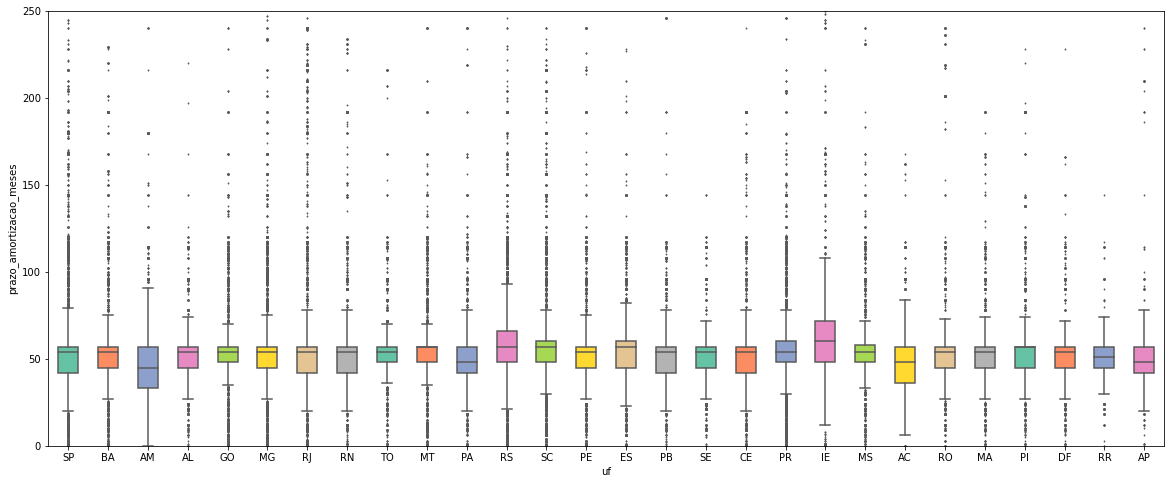

In [67]:
#Prazo de amortização por Estado
plt.figure(figsize=(20,8))
sns.boxplot(data=operacao, y='prazo_amortizacao_meses', x='uf',
            palette='Set2', fliersize=1,
            width=0.5, saturation=1)
plt.ylim([0,250])
plt.show()


In [80]:
#Agora vamos fazer um mapa com a média da taxa de juros por estados do Brasil
# Calculando a média da variável target por UF

df_uf = operacao[['CD_GEOCUF', 'juros']].groupby('CD_GEOCUF', as_index=False).mean()
df_uf

,CD_GEOCUF,juros
0,11.0,5.862780
1,12.0,6.194338
2,13.0,5.933271
3,14.0,5.953320
4,15.0,6.148632
5,16.0,6.100460
6,17.0,6.271963
7,21.0,6.313385
8,22.0,6.189494
9,23.0,5.870472


In [75]:
# Trasnformando a variável em um código da UF para ficar igual o mapa
df_uf['CD_GEOCUF'] = df_uf['CD_GEOCUF'].astype(str)
df_uf

,CD_GEOCUF,juros
0,11.0,5.862780
1,12.0,6.194338
2,13.0,5.933271
3,14.0,5.953320
4,15.0,6.148632
5,16.0,6.100460
6,17.0,6.271963
7,21.0,6.313385
8,22.0,6.189494
9,23.0,5.870472


#### Analisando por grandes regiões do País

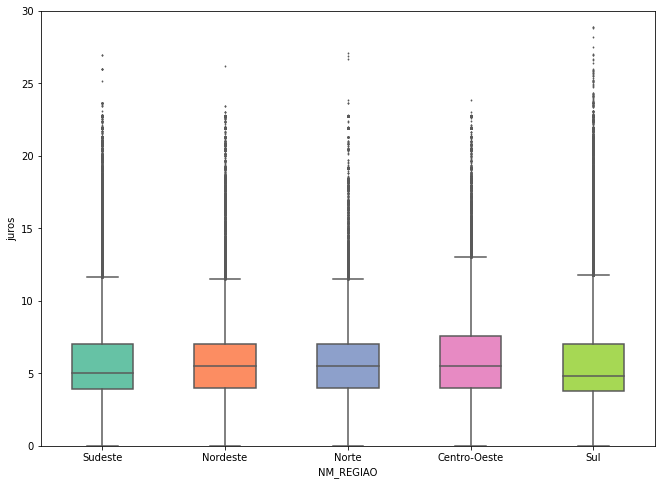

In [71]:
#Juros por regiões do Brasil
plt.figure(figsize=(11,8))
sns.boxplot(data=operacao, y='juros', x='NM_REGIAO',
           palette = 'Set2', fliersize=1, orient='v',
           width=0.5, saturation=1)
plt.ylim([0, 30])
plt.show()

### Conclusão

#### Podemos concluir  que durante todos o processo de tratativas e análise. As empresas continuam investindo mais. Porém isso faz com que as empresas solicitam mais empréstimos e financiamentos. Identificamos que as Micros empresas é o maior volume de empréstimos solcitados. Além disso, o setor "INFRA-ESTRUTURA" é onde tem a grande quantidade distribuinção do financiamento. Sub-setores são os transportes rodoviários.

#### Na região Sul e Sudeste, onde ocorre mais financiamento. Dentro dessas regiões destacamos o estado São Paulo com o maior volume de empréstimos. No estados de Rio Grade do Sul é onde concetrado grandes quantidades de Micro Empresa com 65%. 

#### Observamos que 0 a 10% de juros são muitas empresas. Passando de 10%,os juros maiores são operados com poucas empresas e o prazo de amortização varia entre 50 a 100 meses. Juros mais alto passando de 30% é localizado na região de São Paulo. Maior valor de operação são solicitados pelas Micros e pequenas empresas.